# Extra Trees
Was one of the top performing models. 

I will make a pipeline, then gridsearch to see if I can get an even better model by adjusting the parameters.  

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

# import sklearn.preprocessing as preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import pickle
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import

In [2]:
df = pd.read_csv('../data/1500_sentiment_api.csv')
df.head(5)

,id,latitude,longitude,price,shared_status,accommodates,accomodation_group,bathrooms,bedrooms,beds_adjusted,neighborhood,has_neighborhood_overview,has_reviews,listing_url,host_in_CO,host_lives_in_neighborhood,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,has_host_about,years_hosting,years_of_reviews,license_listed,response_time,host_lives_in_neighborhood.1,name,host_about,description,neighborhood_overview,amenities,minimum_nights,maximum_nights,min_stay_group,max_stay_group,has_availability,instant_bookable,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bike_scores,walk_scores,property_page_links,transit_scores,name_sent_compound,name_sent_pos,name_sent_neg,name_sent_neu,host_sent_compound,host_sent_pos,host_sent_neg,host_sent_neu,description_sent_compound,description_sent_pos,description_sent_neg,description_sent_neu,neighborhood_sent_compound,neighborhood_sent_pos,neighborhood_sent_neg,neighborhood_sent_neu,25*k
0,177,39.69551,-104.92489,79.0,entire home,2,0-2,1.0,1.0,1.0,Virginia Village,1,1,https://www.airbnb.com/rooms/177,1,1,615,Joe,within an hour,1.0,1.00,1.0,Virginia Village,2.0,2.0,1.0,0.0,1,15.0,6.0,1,0.0,1,Tiny Home in the Heart of the City- ECO FRIENDLY,"I'm originally from Oklahoma, but have lived i...","160 sq ft + 80 sq ft loft for sleeping, Sleeps...","Quiet neighborhood next to park, creeks and bi...","[""Hot water"", ""Long term stays allowed"", ""Coff...",29,400,month,long_term,1,0,120,24,0,4.85,4.96,4.89,4.97,4.94,4.85,4.78,1.56,84.0,51.0,https://www.walkscore.com/score/loc/lat=39.695...,37.0,0.6037,0.304,0.0,0.696,0.6948,0.192,0.000,0.808,0.9476,0.153,0.069,0.778,0.0000,0.000,0.000,1.000,4.0
1,360,39.76758,-105.00316,133.0,entire home,3,3-4,1.0,2.0,2.0,Highland,1,1,https://www.airbnb.com/rooms/360,1,1,666,Jennifer & Giovanni,within an hour,1.0,0.87,1.0,Highland,4.0,4.0,1.0,1.0,1,15.0,4.0,1,0.0,1,Sit in the Peaceful Garden of the Chickadee Co...,We are artists and tinkerers.\r\n \r\nWe enjoy...,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,"[""Coffee maker"", ""Washer"", ""Bedroom comforts"",...",29,35,month,2_months,1,0,174,7,1,4.99,4.99,4.96,5.00,5.00,5.00,4.91,3.26,93.0,90.0,https://www.walkscore.com/score/loc/lat=39.767...,49.0,0.4939,0.242,0.0,0.758,0.9694,0.141,0.023,0.835,0.9814,0.271,0.019,0.709,0.1531,0.025,0.018,0.956,6.0
2,2361919,39.77960,-105.03859,76.0,entire home,2,0-2,1.0,1.0,1.0,Berkeley,1,1,https://www.airbnb.com/rooms/2361919,1,1,5811115,Annette,within a few hours,1.0,0.81,1.0,Berkeley,5.0,6.0,1.0,0.0,1,10.0,8.0,0,1.0,1,The Cloisters at Berkeley,"I love people of all ages and types, dogs, lon...",A private studio apartment in an unbeatable ne...,"Boutiques, bars, restaurants galore! Highlands...","[""Hot water"", ""Long term stays allowed"", ""Coff...",30,1125,month,long_term,1,0,43,3,0,4.67,4.74,4.56,4.67,4.60,4.93,4.60,0.40,76.0,81.0,https://www.walkscore.com/score/loc/lat=39.779...,34.0,0.0000,0.000,0.0,1.000,0.9769,0.278,0.000,0.722,0.9269,0.150,0.000,0.850,0.4333,0.067,0.026,0.907,4.0
3,2386289,39.76777,-105.03529,150.0,entire home,4,3-4,1.0,1.0,1.0,West Highland,1,1,https://www.airbnb.com/rooms/2386289,1,1,184771,Melanie,NaN,NaN,1.00,0.0,West Highland,1.0,2.0,1.0,1.0,1,13.0,8.0,1,4.0,1,Sunny Sky Loft in Highlands,"Things I love: dogs, urban gardening, yoga, ho...",Why stay in a stuffy old hotel room when you c...,The neighborhood where the house is located is...,"[""Hot water"", ""Long term stays allowed"", ""Coff...",7,30,week,month,1,0,95,1,0,4.91,4.87,4.89,4.96,4.97,4.93,4.83,0.94,75.0,86.0,https://www.walkscore.com/score/loc/lat=39.767...,39.0,0.4215,0.412,0.0,0.588,0.9716,0.24

In [3]:
df.columns

Index(['id', 'latitude', 'longitude', 'price', 'shared_status', 'accommodates',
       'accomodation_group', 'bathrooms', 'bedrooms', 'beds_adjusted',
       'neighborhood', 'has_neighborhood_overview', 'has_reviews',
       'listing_url', 'host_in_CO', 'host_lives_in_neighborhood', 'host_id',
       'host_name', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'has_host_about',
       'years_hosting', 'years_of_reviews', 'license_listed', 'response_time',
       'host_lives_in_neighborhood.1', 'name', 'host_about', 'description',
       'neighborhood_overview', 'amenities', 'minimum_nights',
       'maximum_nights', 'min_stay_group', 'max_stay_group',
       'has_availability', 'instant_bookable', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating

### Creating a model

In [4]:
X = df[[
    'shared_status', 
    'accommodates',
    'bathrooms', 
    'bedrooms',
    'beds_adjusted',
    'neighborhood', 
    'has_neighborhood_overview', 
    'has_reviews',
    'instant_bookable',
    'host_lives_in_neighborhood',
     'host_is_superhost', 
    'host_has_profile_pic',
    'host_identity_verified', 
    'has_host_about', 
    'years_hosting',
    'license_listed', 
    'minimum_nights',
    'maximum_nights',
     'number_of_reviews',
     'bike_scores',
    'walk_scores',
    'transit_scores',
    'host_sent_compound', 
    'description_sent_compound', 
    'neighborhood_sent_compound',
]]
    
    


y = df['price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)

In [6]:
numeric_features = list(X.select_dtypes(include = 'number').columns)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = list(X.select_dtypes(include = 'object').columns)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', ExtraTreesRegressor())])

In [7]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['accommodates', 'bathrooms',
                                                   'bedrooms', 'beds_adjusted',
                                                   'has_neighborhood_overview',
                                                   'has_reviews',
                                                   'instant_bookable',
                                                   'host_lives_in_neighborhood',
                                                   'host_is_superhost',
                                                   'host_has_profile_pic',
                                                   'host_identity_verified',
                                                   'has_host_ab

In [8]:
y_pred = pipe.predict(X_test)
rmse = (mean_squared_error(y_test, y_pred))**0.5
print("RMSE:", rmse)

RMSE: 92.48516065388118


In [9]:
pipe.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    ['accommodates', 'bathrooms', 'bedrooms',
                                     'beds_adjusted', 'has_neighborhood_overview',
                                     'has_reviews', 'instant_bookable',
                                     'host_lives_in_neighborhood',
                                     'host_is_superhost', 'host_has_profile_pic',
                                     'host_identity_verified', 'has_host_about',
                                     'years_hosting', 'license_listed',
                                     'minimum_nights', 'maximum_nights',
                                     'number_of_reviews', 'bike_scores',
                                     'walk_scores', 'transit_scores',
                                     'host_sent_compound',
                  

In [10]:
et_params = {
    'model__n_estimators':[100, 150, 200],
    'model__max_depth': [None, 1, 2, 3, 4, 5, 6,7],
    'model__min_samples_leaf' : [1,2]
}

In [11]:
gs= GridSearchCV(pipe, param_grid=et_params, cv=5)

In [12]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['accommodates',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'beds_adjusted',
                                                                          'has_neighborhood_overview',
                                                                          'has_reviews',
                                                                          'instant_booka

In [13]:
gs.best_params_

{'model__max_depth': None,
 'model__min_samples_leaf': 2,
 'model__n_estimators': 150}

In [14]:
y_pred = gs.predict(X_test)
rmse = (mean_squared_error(y_test, y_pred))**0.5
print("RMSE:", rmse)

RMSE: 86.11014466125752


In [15]:
et_params2 = {
    'model__n_estimators':[150],
    'model__max_depth': [None],
    'model__min_samples_leaf' : [2],
    'model__max_features': ['sqrt', None],
    'model__min_weight_fraction_leaf': [x / 10 for x in range(0, 2)]
}

In [16]:
gs= GridSearchCV(pipe, param_grid=et_params2, cv=5)

In [17]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['accommodates',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'beds_adjusted',
                                                                          'has_neighborhood_overview',
                                                                          'has_reviews',
                                                                          'instant_booka

In [18]:
y_pred = gs.predict(X_test)
rmse = (mean_squared_error(y_test, y_pred))**0.5
print("RMSE:", rmse)

RMSE: 85.86592249790772


In [19]:
gs.best_params_

{'model__max_depth': None,
 'model__max_features': None,
 'model__min_samples_leaf': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 150}

In [20]:
et_params3 = {
    'model__n_estimators':[150],
    'model__max_depth': [None],
    'model__min_samples_leaf' : [2],
    'model__max_features': ['sqrt', 'log2'],
    'model__min_weight_fraction_leaf': [0]
}

In [21]:
gs= GridSearchCV(pipe, param_grid=et_params3, cv=5)

In [22]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['accommodates',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'beds_adjusted',
                                                                          'has_neighborhood_overview',
                                                                          'has_reviews',
                                                                          'instant_booka

In [23]:
y_pred = gs.predict(X_test)
rmse = (mean_squared_error(y_test, y_pred))**0.5
print("RMSE:", rmse)

RMSE: 85.33848092032362


In [24]:
gs.best_params_

{'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 2,
 'model__min_weight_fraction_leaf': 0,
 'model__n_estimators': 150}

In [39]:
with open('../pickle/et_model.pkl', 'wb') as f:
    pickle.dump(gs.best_estimator_, f)

In [26]:
numeric_transformer=gs.best_estimator_.named_steps['preprocessor'].named_transformers_['num']
categorical_transfomer=gs.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']

In [27]:
gs.best_estimator_.named_steps['preprocessor'].named_transformers_['num']

Pipeline(steps=[('scaler', StandardScaler())])

In [28]:
gs.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']

OneHotEncoder(handle_unknown='ignore')

In [29]:
# numeric_feature_names=
numeric_transformer.get_feature_names_out(numeric_features)


array(['accommodates', 'bathrooms', 'bedrooms', 'beds_adjusted',
       'has_neighborhood_overview', 'has_reviews', 'instant_bookable',
       'host_lives_in_neighborhood', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'has_host_about',
       'years_hosting', 'license_listed', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'bike_scores',
       'walk_scores', 'transit_scores', 'host_sent_compound',
       'description_sent_compound', 'neighborhood_sent_compound'],
      dtype=object)

In [30]:
all_features = gs.best_estimator_[:-1].get_feature_names_out()

In [31]:

# Get the feature importances
importances = gs.best_estimator_.named_steps['model'].feature_importances_

In [32]:
df_plot = pd.DataFrame({'all_features': all_features,
                   'feature_importance': importances})

In [33]:
df_plot.head()

,all_features,feature_importance
0,num__accommodates,0.153076
1,num__bathrooms,0.165087
2,num__bedrooms,0.162710
3,num__beds_adjusted,0.095358
4,num__has_neighborhood_overview,0.008923


In [34]:
df_plot['all_features']=df_plot['all_features'].str[5:]


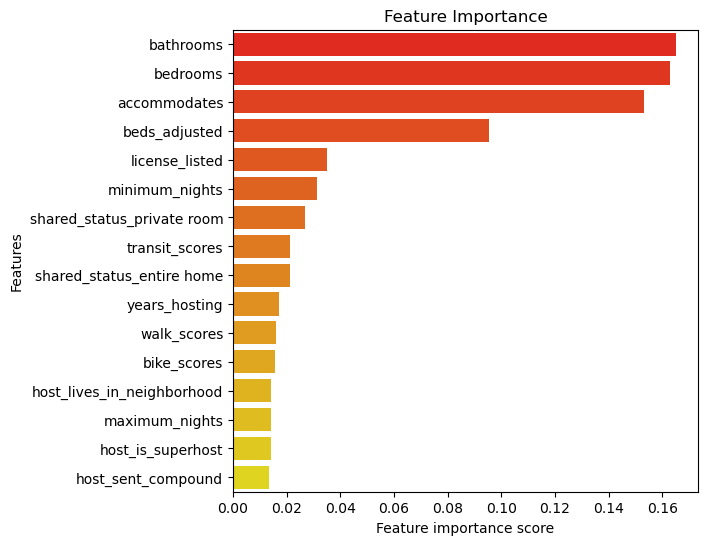

''

In [43]:
feature_scores = pd.Series(importances, index=df_plot['all_features']).sort_values(ascending=False).head(16)

f, ax = plt.subplots(figsize=(6, 6))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df, palette='autumn')
ax.set_title("Feature Importance")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
# plt.savefig('../images/feature_importance.png', bbox_inches='tight')

plt.show()
;
